In [ ]:
## In this step, we will identify features with high importance by using three approaches (1. Univariate selection,
## 2. Feature Importance, and 3. Correlation Matrix with Heat Map)

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan_train_cleaned.csv')

In [4]:
df_cat = pd.read_csv('train_categorical_cleaned.csv')

In [16]:
df_cat.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_cat,Married_cat,Dependents_cat,Education_cat,Self_Employed_cat,Property_Area_cat,Loan_Status_cat
0,5849,0,143000,360,1,2,1,2,0,1,2,1
1,4583,1508,128000,360,1,2,2,3,0,1,0,0
2,3000,0,66000,360,1,2,2,2,0,2,2,1
3,2583,2358,120000,360,1,2,2,2,1,1,2,1
4,6000,0,141000,360,1,2,1,2,0,1,2,1


In [8]:
X = df_cat.iloc[:,0:11]
y = df_cat.iloc[:,-1]

In [9]:
## Univariate Selection

bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns


print(featureScores.nlargest(5,'Score'))  #print 10 best features

               Specs         Score
2         LoanAmount  68804.571878
1  CoapplicantIncome  11342.184564
0    ApplicantIncome     93.904964
4     Credit_History     26.720881
3   Loan_Amount_Term      3.778554


In [32]:
## Feature Importance
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.1688034  0.10830956 0.1724311  0.0461406  0.28817028 0.02756946
 0.02412989 0.06314691 0.01766266 0.03749716 0.04613899]


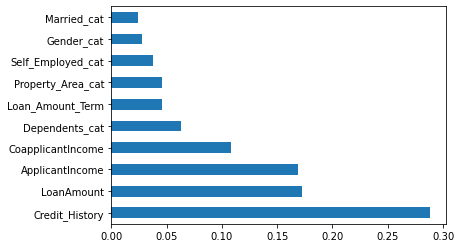

In [33]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

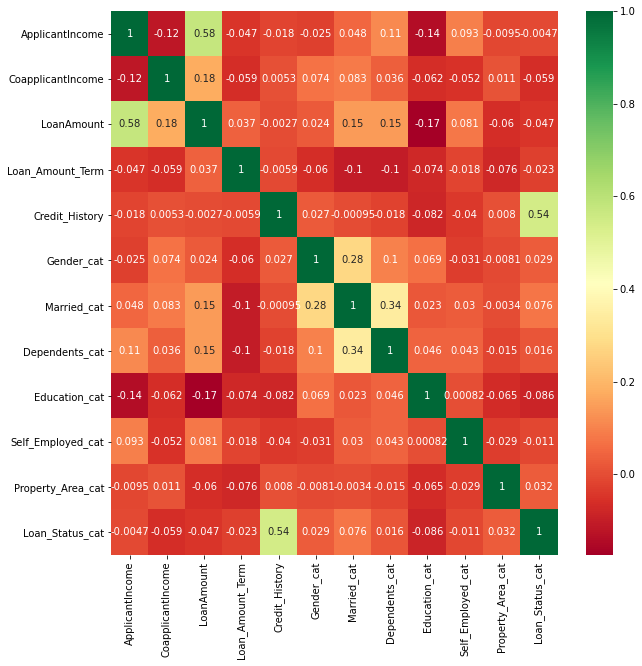

In [5]:
## Correlation Matrix with Heatmap
#get correlations of each features in dataset
corrmat = df_cat.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df_cat[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
### Based on the three above feature selection approaches, all three appraoches suggest that Loan Amount, Credit History,
### Applicant Income, and Coapplicant Income are important features.

In [ ]:
### Next, we will build a pair plot with these important features and determine what are some good and bad regressor options
### first, let's only select important features that we identified

In [10]:
df_important = df_cat[['Credit_History','LoanAmount','ApplicantIncome','CoapplicantIncome','Loan_Status_cat']]

In [12]:
df_important.to_csv('df_imp.csv',index=False)

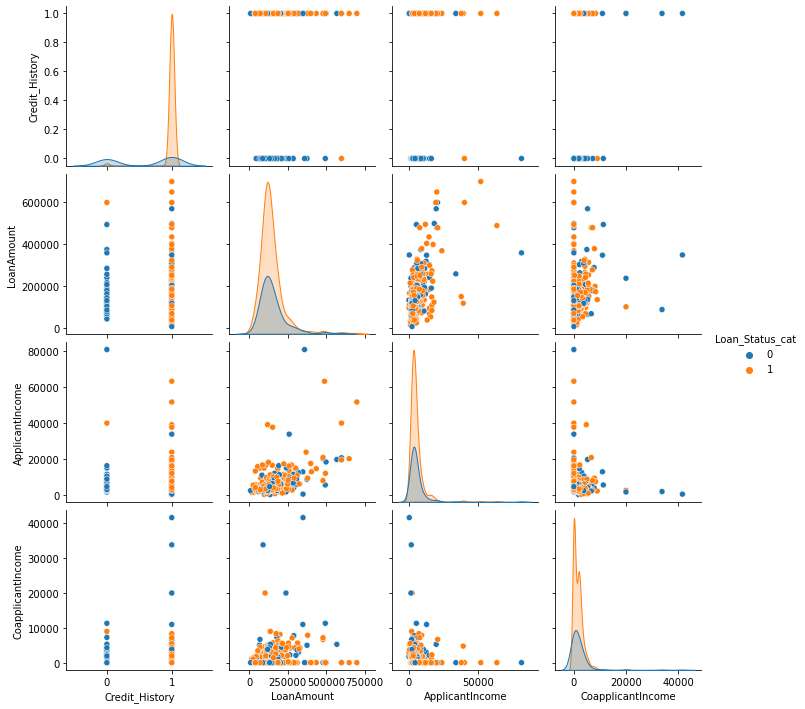

In [11]:
sns.pairplot(df_important,hue="Loan_Status_cat")

In [ ]:
### In conclusion, since the points are clumped together, logistic regression won't work. Logistic regression method uses
### a straight line to divide the data set into groups. Thus, logistic regression is for linear classification.
### Instead, we will be using ensemble learning models such as random forest classifier, ADABoost classifier, and Gradient Boost.
